In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'D:\University Data\8 semester\Lab Machine learning\lab13\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'D:\University Data\8 semester\Lab Machine learning\CVS_DS\train'
validation_dir = r'D:\University Data\8 semester\Lab Machine learning\CVS_DS\validation'
test_dir = r'D:\University Data\8 semester\Lab Machine learning\CVS_DS\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

C:\Users\AFNAN AHMAD\anaconda3\envs\myenv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 20,
                         callbacks = callbacks)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.8700 - acc: 0.5981  
Epoch 1: val_loss improved from inf to 0.52929, saving model to D:\University Data\8 semester\Lab Machine learning\lab13\E1-cp-0001-loss0.53.h5
50/50 [==============================] - 151s 3s/step - loss: 0.8700 - acc: 0.5981 - val_loss: 0.5293 - val_acc: 0.7812
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.5251 - acc: 0.7531  
Epoch 2: val_loss did not improve from 0.52929
50/50 [==============================] - 138s 3s/step - loss: 0.5251 - acc: 0.7531 - val_loss: 0.5386 - val_acc: 0.7098
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.4372 - acc: 0.8081  
Epoch 3: val_loss improved from 0.52929 to 0.51446, saving model to D:\University Data\8 semester\Lab Machine learning\lab13\E1-cp-0003-loss0.51.h5
50/50 [==============================] - 138s 3s/step - loss: 0.4372 - acc: 0.8081 - val_loss: 0.5145 - val_acc: 0.7277
Epoch 4/20
50/50 [==========

In [12]:
model_history.history

{'loss': [0.8699964880943298,
  0.5250933170318604,
  0.43715086579322815,
  0.39425426721572876,
  0.34687718749046326,
  0.31994181871414185,
  0.27387934923171997,
  0.2490151971578598,
  0.24462269246578217,
  0.2185678333044052,
  0.20255182683467865,
  0.17677649855613708,
  0.18288250267505646,
  0.155966117978096,
  0.13910946249961853,
  0.13094116747379303,
  0.11320832371711731,
  0.11548464745283127,
  0.10328951478004456,
  0.08469129353761673],
 'acc': [0.5981249809265137,
  0.753125011920929,
  0.8081250190734863,
  0.8174999952316284,
  0.8387500047683716,
  0.8450000286102295,
  0.8881250023841858,
  0.8856250047683716,
  0.8931249976158142,
  0.9125000238418579,
  0.9162499904632568,
  0.9350000023841858,
  0.9212499856948853,
  0.9375,
  0.9431250095367432,
  0.9487500190734863,
  0.9574999809265137,
  0.9537500143051147,
  0.9581249952316284,
  0.9706249833106995],
 'val_loss': [0.5292880535125732,
  0.538587212562561,
  0.5144630074501038,
  0.39694398641586304,
  

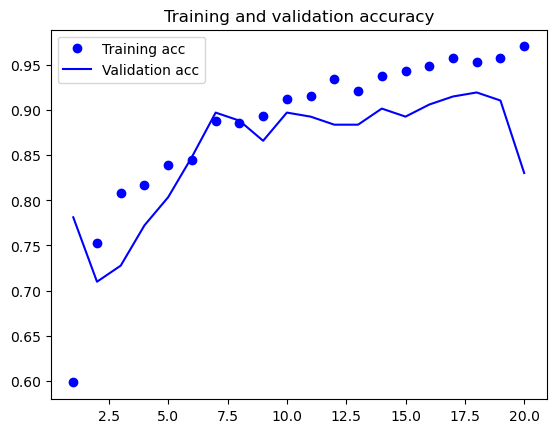

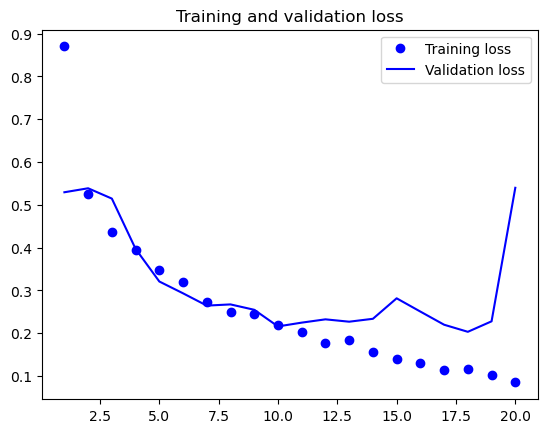

In [14]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 8s 1s/step


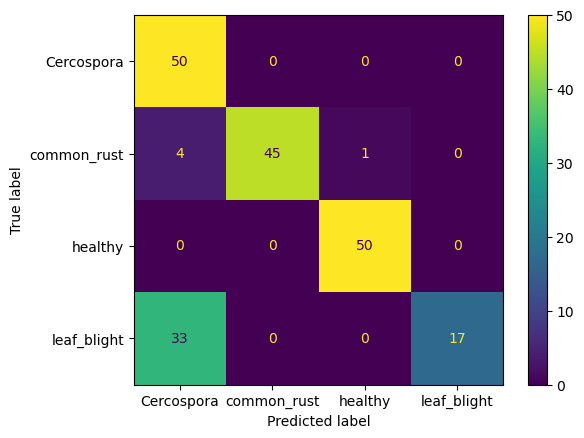

In [16]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\checkpoint\ML Lab\Lab13\E1-cp-0015-loss0.20.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [18]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.57      1.00      0.73        50
 common_rust       1.00      0.90      0.95        50
     healthy       0.98      1.00      0.99        50
 leaf_blight       1.00      0.34      0.51        50

    accuracy                           0.81       200
   macro avg       0.89      0.81      0.79       200
weighted avg       0.89      0.81      0.79       200

